In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import dataframe_image as dfi
from sklearn.linear_model import LinearRegression

In [32]:
df = pd.read_csv("Wine_RegionColor.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine Region,Wine Color
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6,Terras De Cister,Rose
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6,Alentejo,Red
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7,Alentejo,Red
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10,5,Setubal,White
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12,6,Terras De Cister,Red


In [34]:
#fix alcohol column
check_decimals = lambda x: str(x).count('.') <= 1

remove_extra_decimals = df['alcohol'].apply(check_decimals)

df = df[remove_extra_decimals]

df['alcohol'] = df['alcohol'].astype(float)

#save new df as csv
df.to_csv("Wine_RegionColor_Cleaned.csv")

In [35]:
#calculate correlation coef
corr_dict = {}
for var in df.columns[0:11]:
    corr_dict[var] = df[var].corr(df["quality"])
    
#convert to df 
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Correlation Coefficient'])

#define function for conditional formatting
def cond_formatting(x):
    if x == corr_df['Correlation Coefficient'].max():
        return 'background-color: #ef9075'
    elif x == corr_df['Correlation Coefficient'].min():
        return 'background-color: #f7bfb0'
    else:
        return None
    
#save styled df as png   
corr_df_styled = corr_df.style.applymap(cond_formatting)
corr_df_styled.export_png('images/corr_df.png')


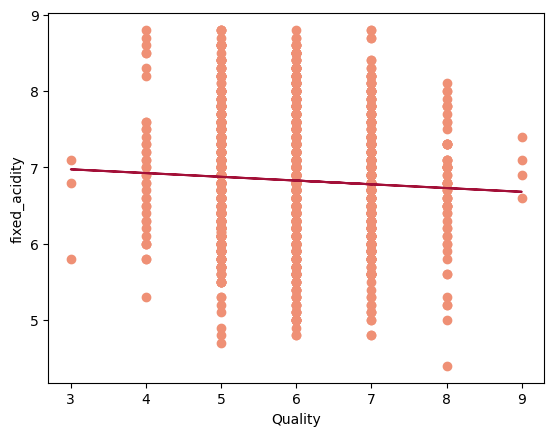

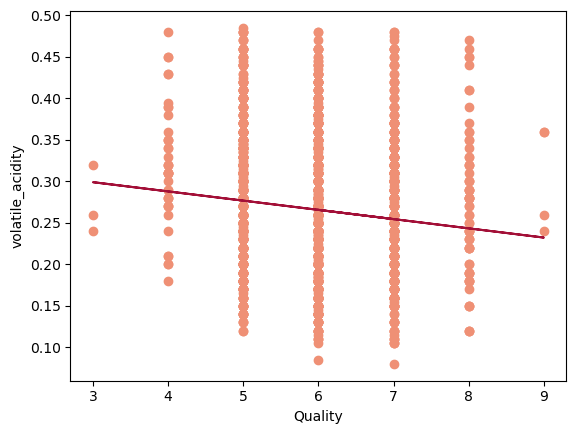

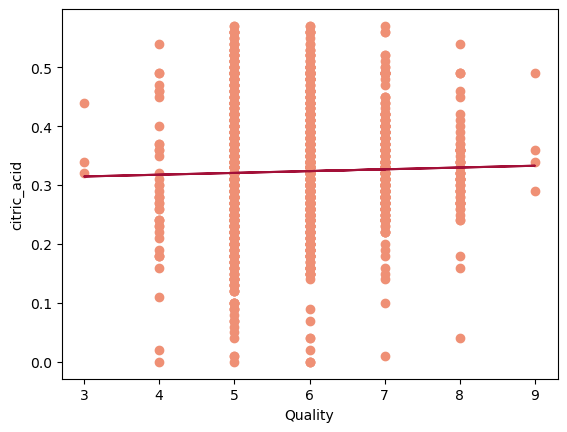

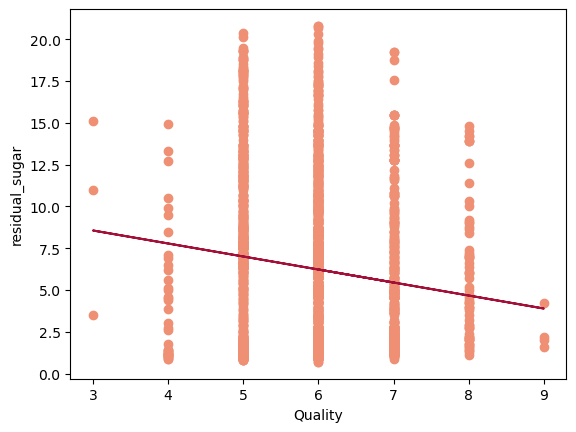

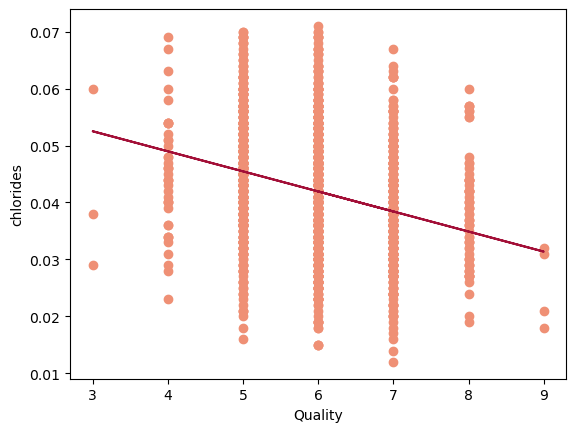

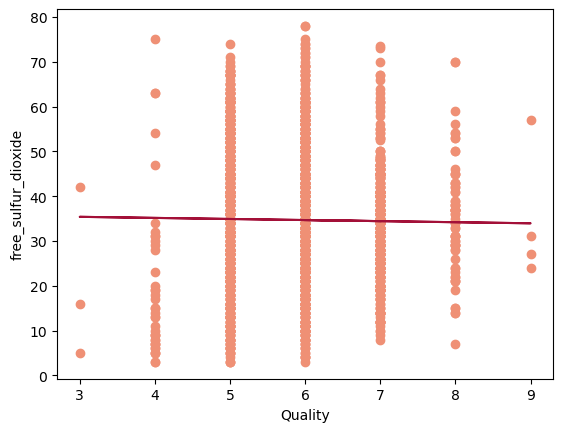

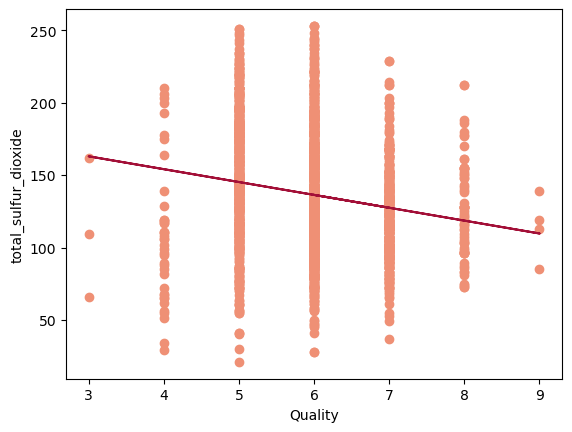

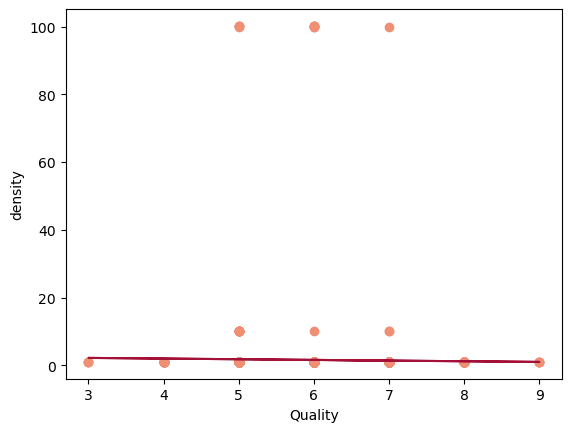

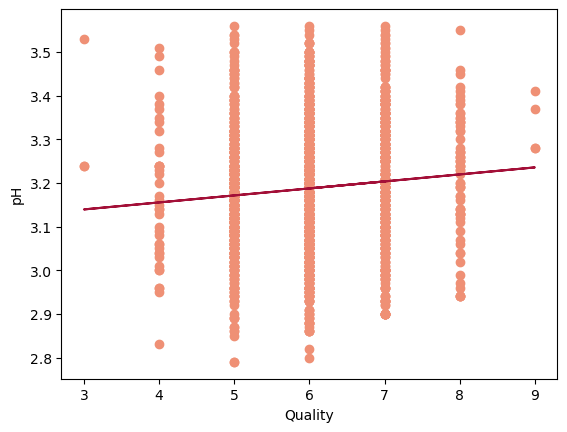

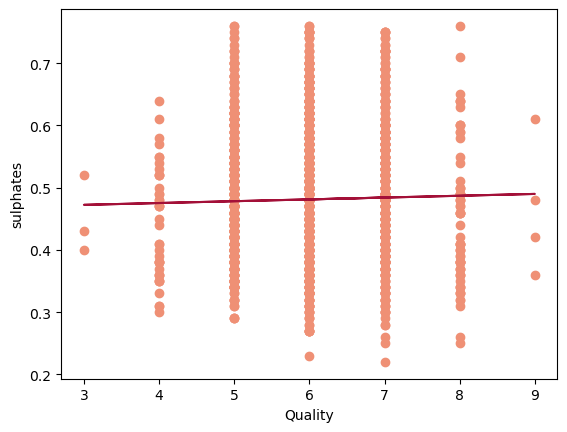

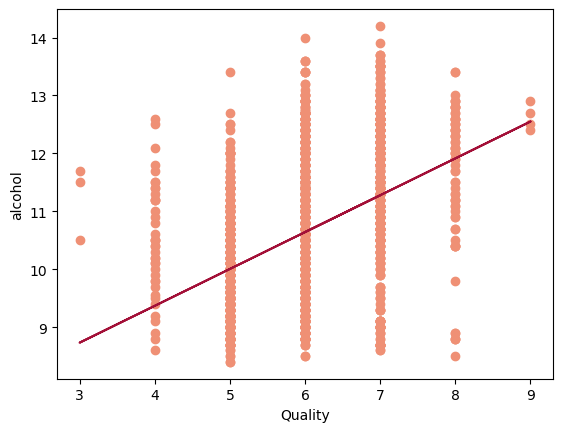

In [36]:
#create function that calculates linear regression for all of the vairables
def linear_regression_calc():
    
    for var in df.columns[0:11]:
        
        #define x and y
        X = df['quality']
        y = df[var]
        
        #reshape x 
        X_reshape = X.values.reshape(-1,1)
        y_reshape = y.values.reshape(-1,1)
        
        #fit model
        model = LinearRegression()
        model.fit(X_reshape, y_reshape)
        
        
        y_pred = model.predict(X_reshape)
        
        #plot
        plt.scatter(X_reshape, y_reshape, c=['#ef9075'])
        plt.plot(X_reshape, y_pred, color='#a31038')
        plt.ylabel(var)
        plt.xlabel("Quality")
        #save fig
        plt.savefig(f"images/{var}.png")

        plt.show()
        
linear_regression_calc()